In [396]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.signal import find_peaks
from scipy.interpolate import NearestNDInterpolator

mat = scipy.io.loadmat('../../../CaImAn/demos/notebooks/Results/02-03cnmfe.mat')

# TODO: get overlapping peaks with linearized behavior
# TODO: get firing rates

# Load Frames and Time Stamps
load_behavior = 'TimeSync/behavior_frames_02_03.npy'
load_miniscope = 'TimeSync/miniscope_frames_02_03.npy'
load_t_behavior = 'TimeSync/t_behavior_02_03.npy'
load_t_miniscope = 'TimeSync/t_miniscope_02_03.npy'
load_linearized_behavior = 'LinearizedBehavior/02_03.npy'
load_category = 'LinearizedBehavior/02_03_category.npy'

behavior_frames = np.load(load_behavior)
behavior_frames = behavior_frames - 932 # Fixing because Behavior Tracking Started at 932
miniscope_frames = np.load(load_miniscope)
t_behavior = np.load(load_t_behavior)
t_miniscope = np.load(load_t_miniscope)

linearized_behavior = np.load(load_linearized_behavior)
cat = np.load(load_category)

# Convert time to 0 to ms
start = 0
stop = np.round((t_miniscope[-1] - t_miniscope[0]),1)
t_behavior = np.linspace(0, stop, len(t_behavior))
t_miniscope = np.linspace(0, stop, len(t_miniscope))
print("Time Duration (s) = ", stop)


Time Duration (s) =  867.6


In [398]:
# Get Raw Calcium Data

# d = np.transpose(mat['C'])
d = np.transpose(mat['S'])
data = [d[f] for f in miniscope_frames]
data = np.transpose(data)

np.shape(data)

(120, 8677)

In [216]:
def convert_time(times, convert_to):
    # Get time array indices from miniscope to behavior
    # or vice versa
    index_array = []        
    if convert_to != "behavior" and convert_to != "miniscope":
        print("Error - Inputs wrong format")
        return []
        
    for t in range(len(times)):
        idx = (np.abs(t_behavior - times[t])).argmin()
        index_array.append(int(idx))
        
    return index_array

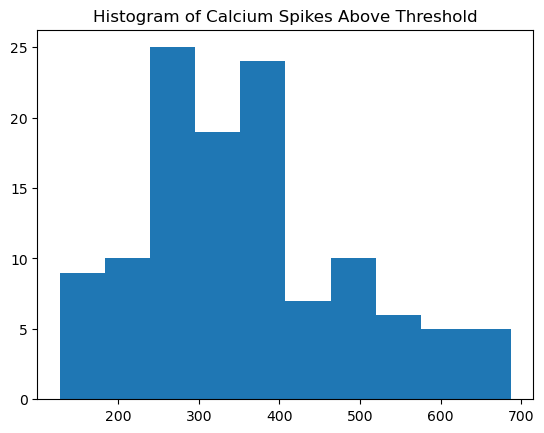

In [399]:
def find_calcium_peaks(data, thresh):
    above_threshold_count = []
    calcium_peaks = []
    # threshold = np.mean(d) + np.std(d)*3
    
    for d in data:
        peaks, _ = find_peaks(d, threshold=np.std(d)*thresh)
        above_threshold_count.append(np.count_nonzero(peaks))
        calcium_peaks.append(peaks)

    # Sanity check about threshold 
    plt.hist(above_threshold_count)
    plt.title("Histogram of Calcium Spikes Above Threshold")
    plt.show()
    
    return calcium_peaks

calcium_peaks = find_calcium_peaks(data, thresh=1)

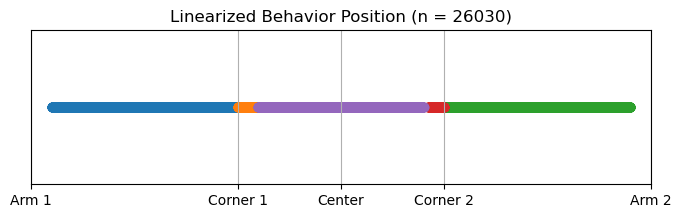

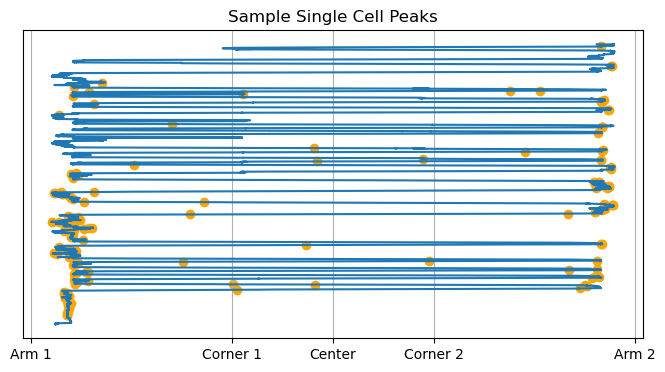

Number of Calcium Peaks =  42992


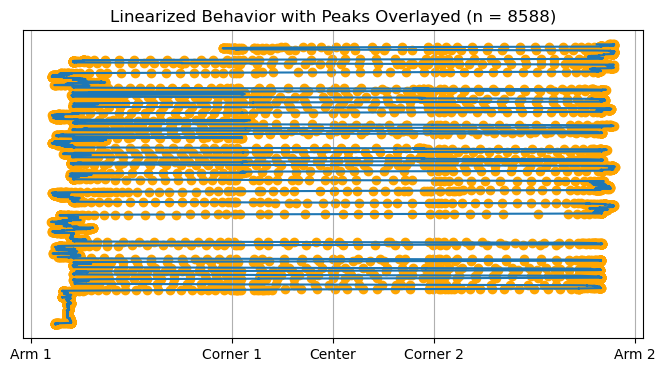

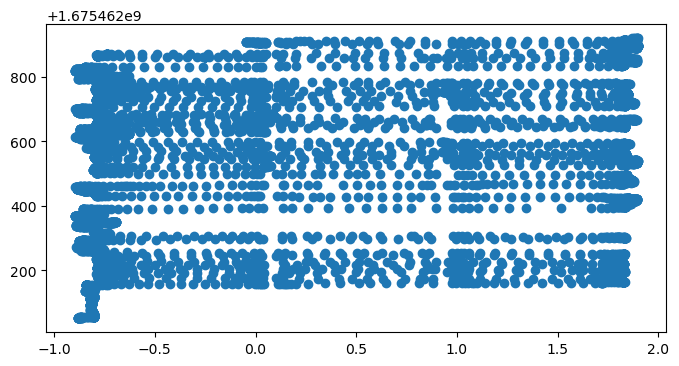

In [336]:
def label_behavior_plot(ax):
    plt.grid()
    ax.set_yticks([])
    ax.set_xticks([-1, 0, 0.5, 1, 2])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'Arm 1'
    labels[1] = 'Corner 1'
    labels[2] = 'Center'
    labels[3] = 'Corner 2'
    labels[4] = 'Arm 2'
    ax.set_xticklabels(labels)

# Linearized Behavior Plot
fig = plt.figure(figsize=(8, 2))
ax = fig.gca()
label_behavior_plot(ax)
for c in range(1,6):
        plt.scatter([linearized_behavior[i] for i in range(len(cat)) if cat[i] == c], [1 for i in range(len(cat)) if cat[i] == c])
plt.xlim(-1,2)
plt.ylim(0.9,1.1)
plt.title("Linearized Behavior Position (n = "+ str(len(cat))+ ")")
plt.show()

def flatten(calcium_peaks):
    flattened = []
    peak_count = 0

    for peak in calcium_peaks:
        for p in peak:
            flattened.append(p)
            peak_count += 1
    print("Number of Calcium Peaks = ", peak_count)
    return np.sort(np.unique(flattened))

mini_times = t_miniscope[calcium_peaks[7]]
a = convert_time(mini_times,"behavior")
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
label_behavior_plot(ax)
plt.plot(linearized_behavior, t_behavior)
plt.scatter(linearized_behavior[a], t_behavior[a], c='orange')
plt.title("Sample Single Cell Peaks")
plt.show()


flattened = flatten(calcium_peaks)
mini_times = t_miniscope[flattened]
a = convert_time(mini_times,"behavior")

fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
label_behavior_plot(ax)
plt.plot(linearized_behavior, t_behavior)
plt.scatter(linearized_behavior[a], t_behavior[a], c='orange')
plt.title("Linearized Behavior with Peaks Overlayed (n = "+ str(len(flattened)) +")")
plt.show()



fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
# plt.plot(linearized_behavior[a])
plt.scatter(linearized_behavior[a], t_behavior[a])
plt.show()

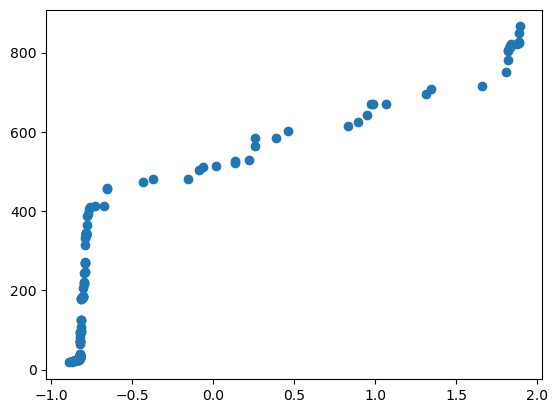

In [397]:
# Sorting Each Calcium Peak

x = linearized_behavior[a]
y = t_behavior[a]

x = np.sort(x)
y = y[np.argsort(x)]

plt.scatter(x,y)
plt.show()

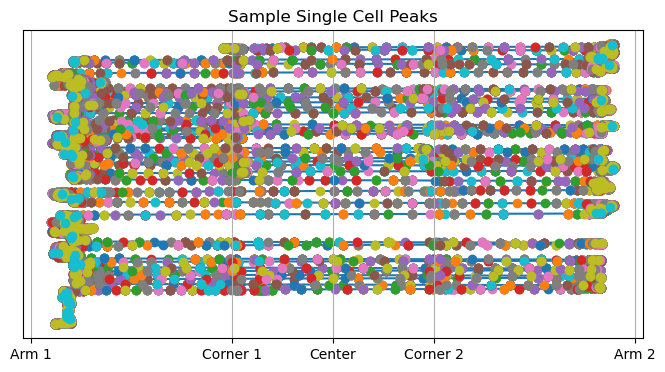

In [339]:
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
label_behavior_plot(ax)
plt.plot(linearized_behavior, t_behavior, zorder=0)

for i in range(120):
    mini_times = t_miniscope[calcium_peaks[i]]
    a = convert_time(mini_times,"behavior")
    plt.scatter(linearized_behavior[a], t_behavior[a])

plt.title("Sample Single Cell Peaks")
plt.show()

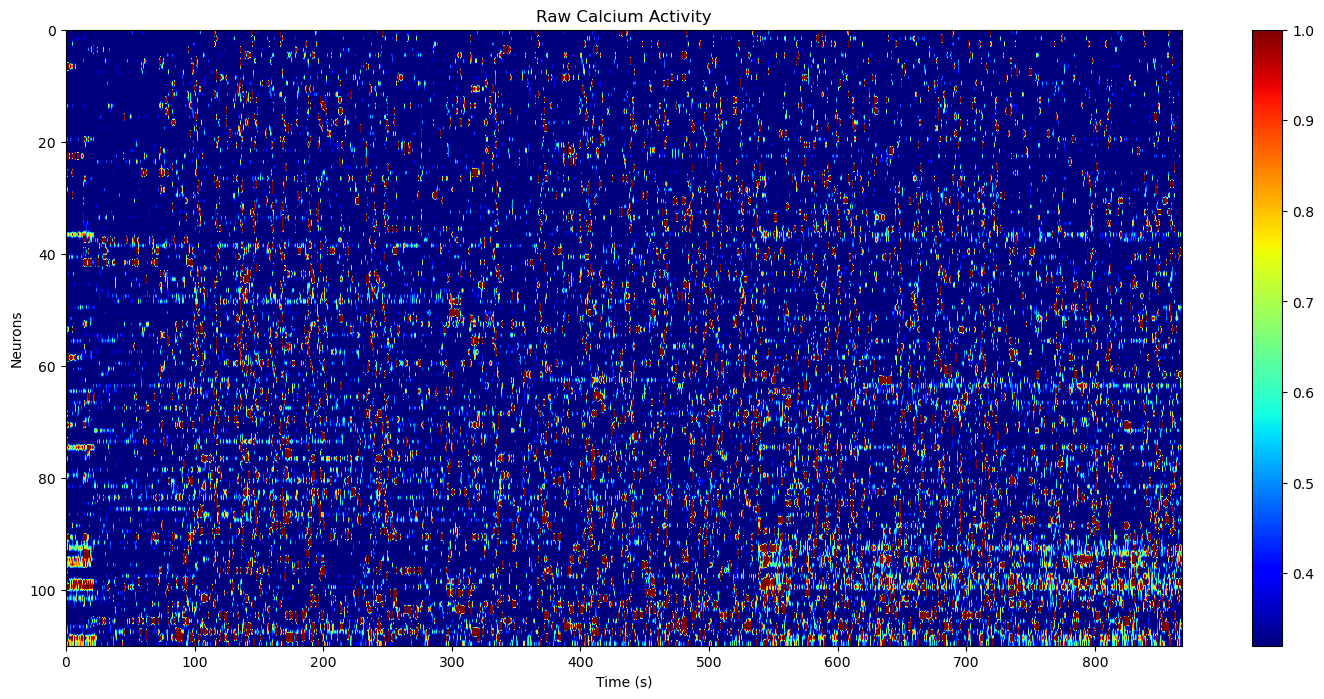

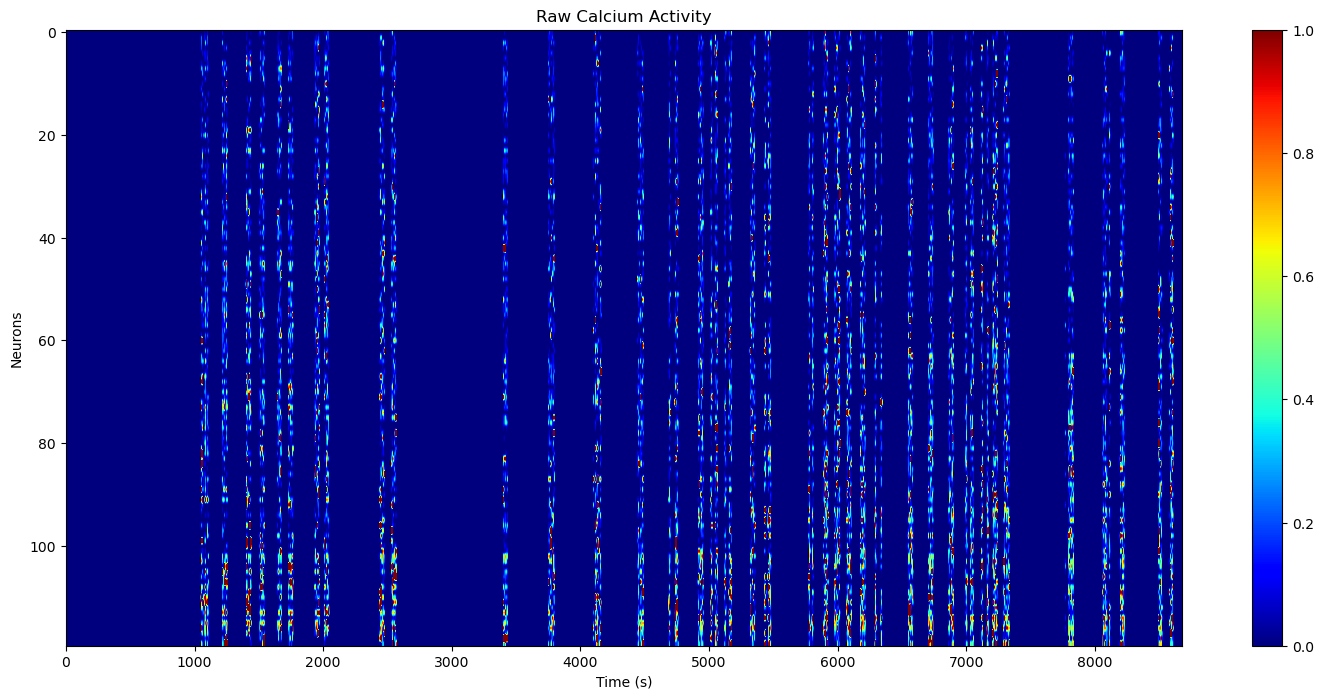

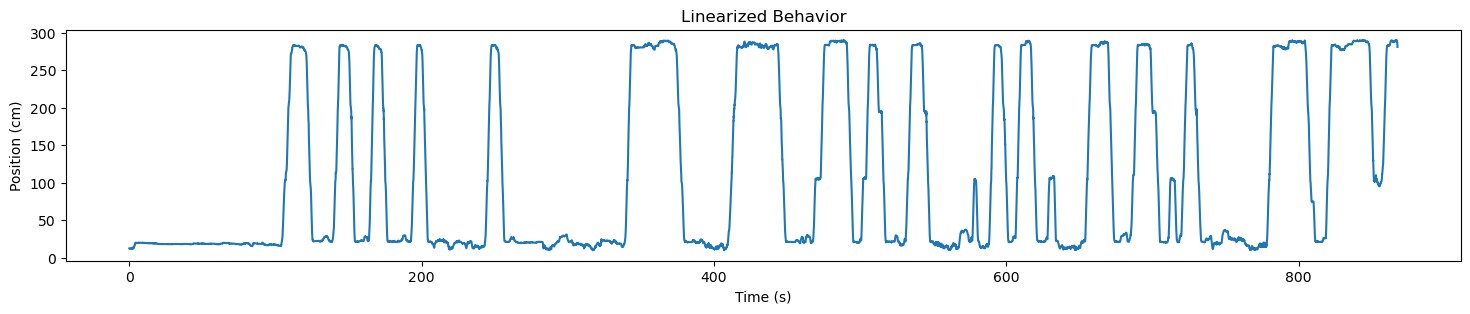

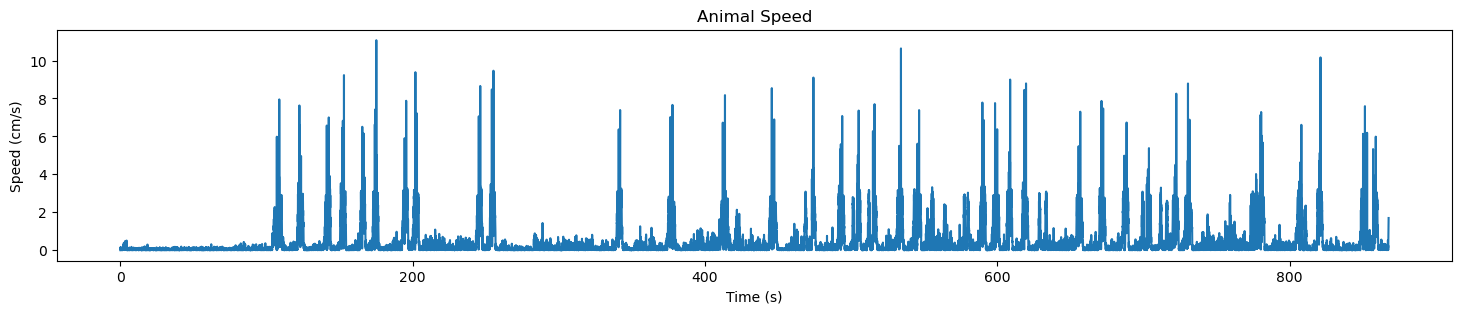

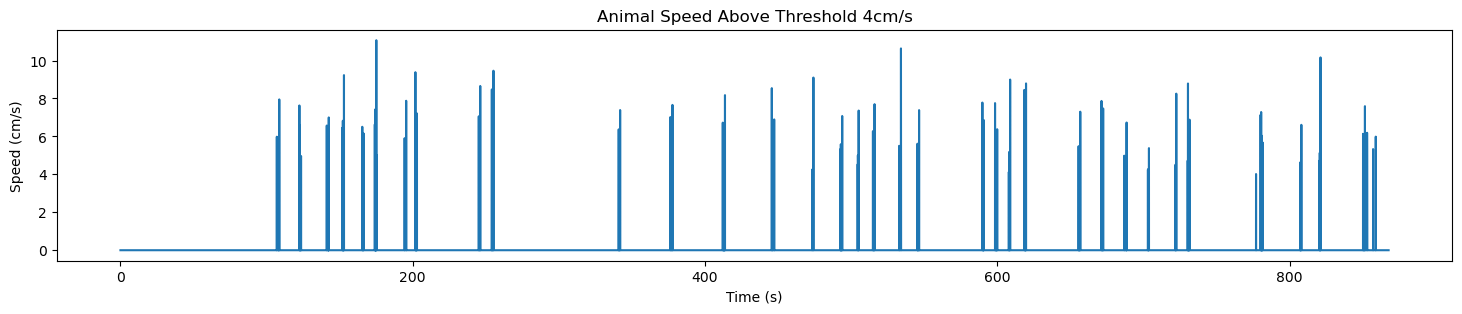

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

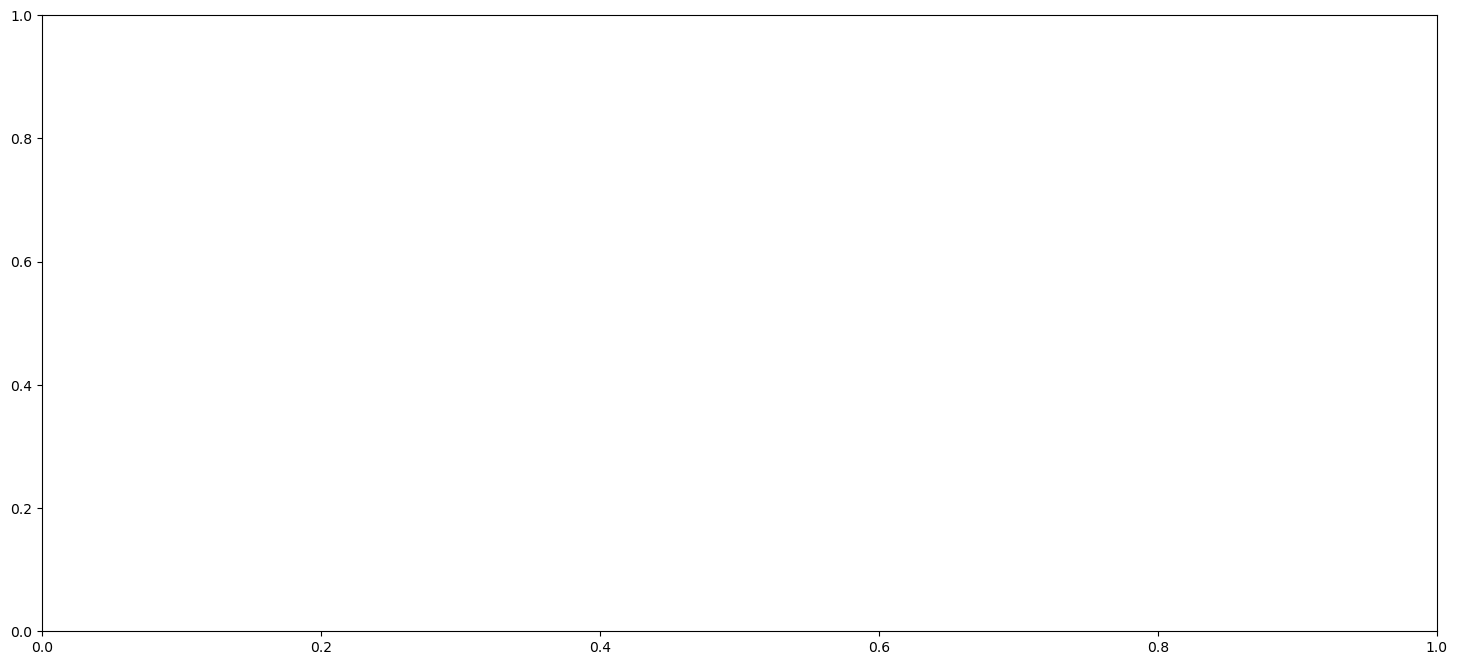

In [615]:
# i = np.argsort(np.max(data, axis=1))
i = np.argsort(np.mean(data, axis=1))

fig = plt.figure(figsize=(18, 8))
ax = fig.gca()
# data[i][0:-10]
plt.imshow(data[i][0:-10], cmap=plt.cm.jet, norm = 'linear', aspect='auto', vmin=0.32, vmax=1, extent=[0,stop,len(data)-10,0])
plt.ylabel("Neurons")
plt.xlabel("Time (s)")
plt.title("Raw Calcium Activity")
plt.colorbar()
plt.show()

run_data = np.squeeze(run_data)
i = np.argsort(np.mean(run_data, axis=1))
fig = plt.figure(figsize=(18, 8))
ax = fig.gca()
# data[i][0:-10]
plt.imshow(run_data[i], cmap=plt.cm.jet, norm = 'linear', aspect='auto', vmin=0, vmax=1)
plt.ylabel("Neurons")
plt.xlabel("Time (s)")
plt.title("Raw Calcium Activity")
plt.colorbar()
plt.show()


scaled_position = (linearized_behavior + 1)*100

fig = plt.figure(figsize=(18, 3))
ax = fig.gca()
plt.plot(t_behavior, scaled_position)
plt.ylabel("Position (cm)")
plt.xlabel("Time (s)")
plt.title("Linearized Behavior")
plt.show()

rat_speed = np.append(0, np.abs(np.diff(scaled_position)))
fig = plt.figure(figsize=(18, 3))
ax = fig.gca()
plt.plot(t_behavior, rat_speed)
plt.ylabel("Speed (cm/s)")
plt.xlabel("Time (s)")
plt.title("Animal Speed")
plt.show()


zeroed_speed = []
speed_threshold = 4 # cm/s
for i in rat_speed:
    if i < speed_threshold:
        zeroed_speed.append(0)
    else:
        zeroed_speed.append(i)

fig = plt.figure(figsize=(18, 3))
ax = fig.gca()
plt.plot(t_behavior, zeroed_speed)
plt.ylabel("Speed (cm/s)")
plt.xlabel("Time (s)")
plt.title("Animal Speed Above Threshold 4cm/s")
plt.show()


fig = plt.figure(figsize=(18, 8))
ax = fig.gca()
# data[i][0:-10]
plt.imshow(data[i][0:-10], cmap=plt.cm.jet, norm = 'linear', aspect='auto', vmin=0.32, vmax=1, extent=[0,stop,len(data)-10,0])
plt.ylabel("Neurons")
plt.xlabel("Time (s)")
plt.title("Raw Calcium Activity")
plt.colorbar()
plt.show()

In [614]:
np.squeeze(run_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

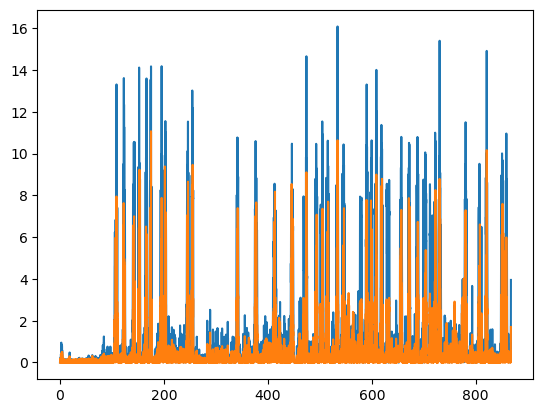

In [591]:
# scaled_miniscope_position = (miniscope_position+1)*100
plt.plot(t_miniscope, miniscope_speed)
plt.plot(t_behavior, rat_speed)

In [594]:
 np.mean(miniscope_speed)/np.mean(rat_speed)

2.735340705126347

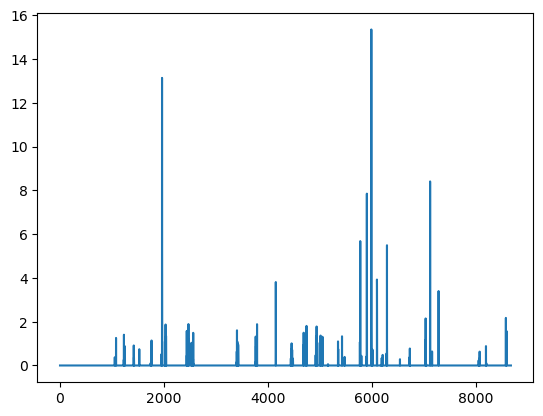

In [595]:
# 

xp = t_behavior ### unit in sec
fp = scaled_position
x = t_miniscope


scaled_miniscope_position = np.interp(x, xp, fp)   ### spit out y array which is the interpolated position for behavior from neuron imaging data
# plt.plot(x, miniscope_position, '.')


# Rat Run Data
run_data = []
# scaled_miniscope_position = (miniscope_position+1)*100
miniscope_speed = np.append(0, np.abs(np.diff(scaled_miniscope_position)))


speed_threshold = 4 # cm/s
a = 8

for i in range(len(data[a])):
    if miniscope_speed[i] < speed_threshold:
        run_data.append(0)
    else:
        run_data.append(data[a][i])

plt.plot(run_data)
plt.show()

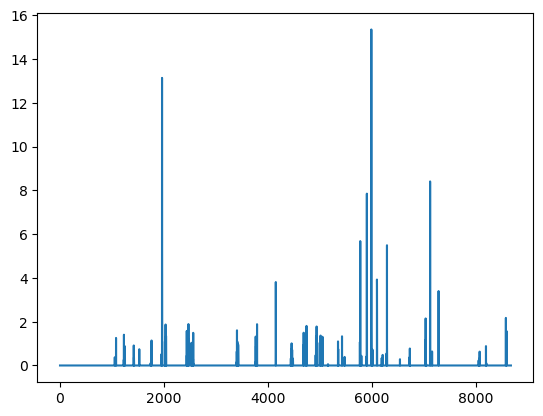

In [605]:
speed_threshold = 4 # cm/s
# a = 8

run_data = []
for a in range(120):
    run_data.append([])
    for i in range(len(data[a])):
        if miniscope_speed[i] < speed_threshold:
            run_data[a].append(0)
        else:
            run_data[a].append(data[a][i])

plt.plot(run_data[8])
plt.show()

In [604]:
np.shape(run_data)

(120, 8677)

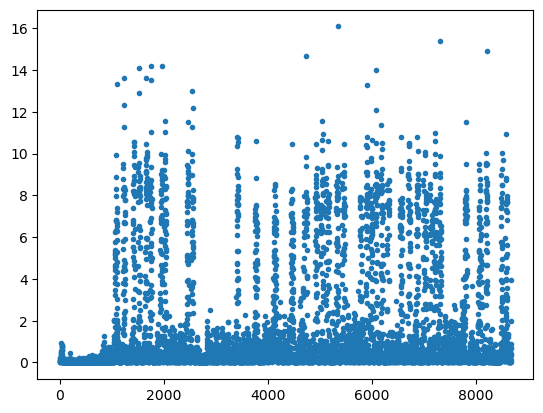

In [577]:
plt.plot(miniscope_speed, '.')

In [568]:
len(run_data), len(rat_speed), len(data[a])

(8677, 26030, 8677)

In [522]:
linearized_behavior

array([-0.87597886, -0.87716288, -0.87584258, ...,  1.84042669,
        1.82750259,  1.81052042])

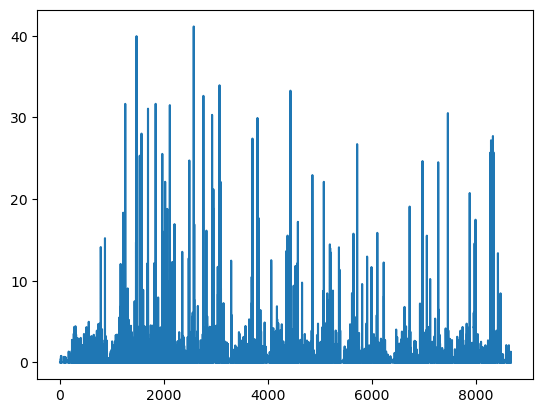

In [415]:
bad = i[-8]
plt.plot(data[bad])

In [402]:
i = np.argsort(np.mean(data, axis=1))


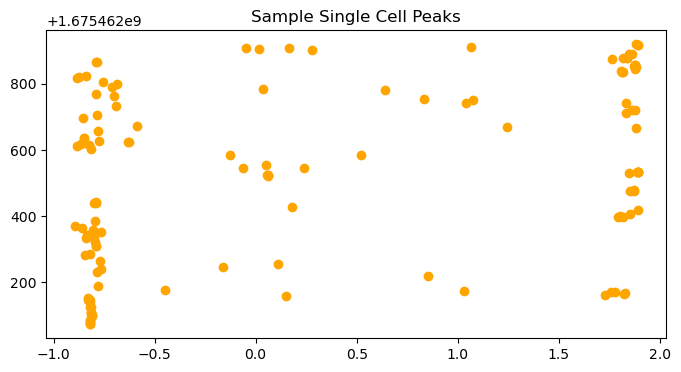

In [351]:
calcium_peaks[3]


mini_times = t_miniscope[calcium_peaks[3]]
a = convert_time(mini_times,"behavior")


fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
# plt.plot(linearized_behavior, t_behavior)
plt.scatter(linearized_behavior[a], t_behavior[a], c='orange')
plt.title("Sample Single Cell Peaks")
plt.show()



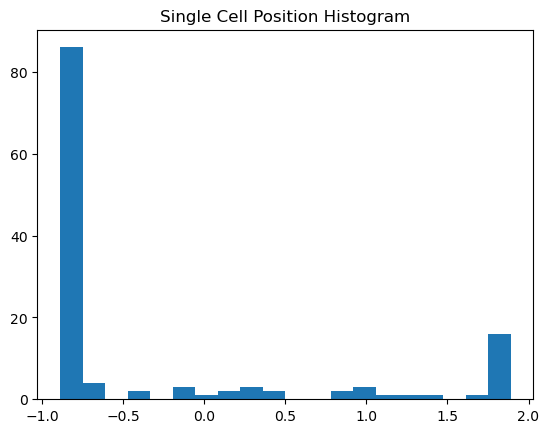

In [421]:
pos = linearized_behavior[a]
time = t_behavior[a]

n_bins = 20
plt.hist(pos, bins = n_bins)
plt.title("Single Cell Position Histogram")
plt.show()

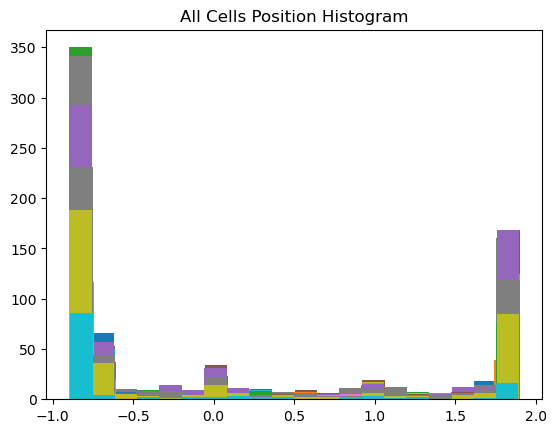

In [423]:
# Run through all cells
# i_sorted_by_max = np.argsort(np.max(data, axis=1))
# sorted_calcium_peak = calcium_peaks[i_sorted_by_max]
n_bins = 20

for i in range(len(calcium_peaks)):
    mini_times = t_miniscope[calcium_peaks[i]]
    a = convert_time(mini_times,"behavior")
    
    pos = linearized_behavior[a]
    
    plt.hist(pos, bins = n_bins)
    
plt.title("All Cells Position Histogram")
plt.show()

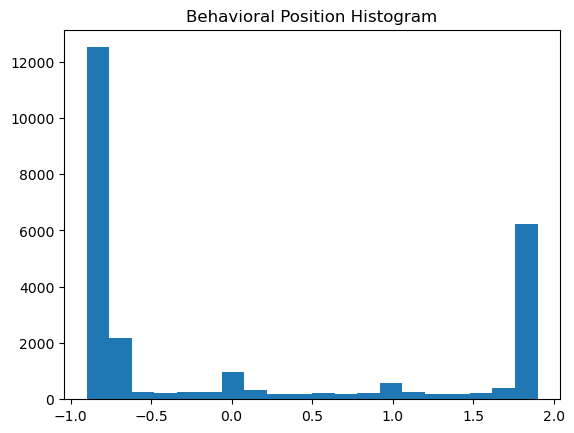

In [425]:
n_bins = 20
plt.hist(linearized_behavior, bins = n_bins)
plt.title("Behavioral Position Histogram")
plt.show()

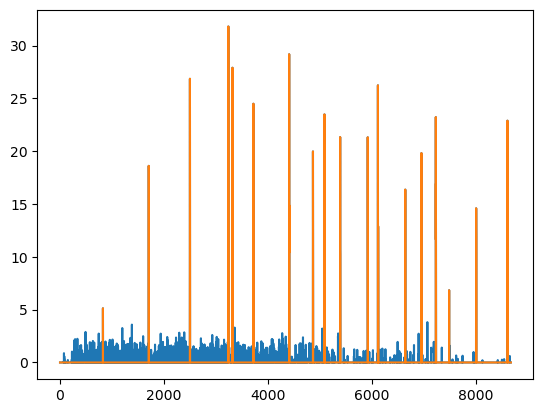

In [497]:
# i = np.argsort(np.mean(data, axis=1))
# bad = i[6]

# plt.plot(data[bad])
a = 7

plt.plot(data[a])

threshold = 5

new_data = []
for i in data[a]:
    if i < 5:
        new_data.append(0)
    else:
        new_data.append(i)

plt.plot(new_data)

In [493]:
8677/10, int(np.round(8.9))

(867.7, 9)

In [494]:
new_data[5650:5670]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15.040567344131178,
 0,
 0,
 0,
 0,
 0,
 5.563288792794792,
 0,
 0,
 0]

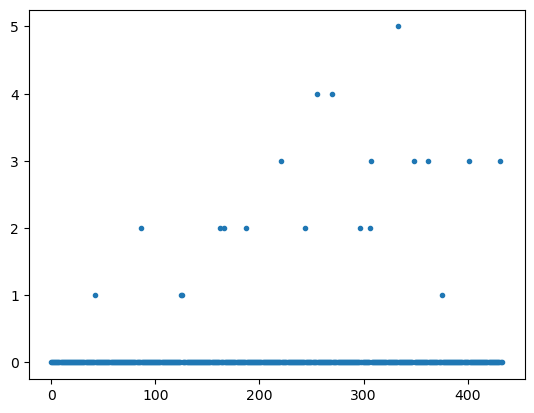

In [515]:
t_bins = 2000 #ms
n_frames = t_bins/100

rates = np.zeros(int(np.round(len(new_data)/n_frames)))

count = 0
rate_i = 0
for i in range(len(new_data)):
    if i%n_frames == 0:
        rates[rate_i] = count
        count = 0
        rate_i += 1
    if new_data[i] != 0:
        count += 1
        
rates
    

plt.plot(rates, '.')

In [507]:
t_behavior[100:200]

array([3.33320527, 3.36653732, 3.39986938, 3.43320143, 3.46653348,
       3.49986553, 3.53319759, 3.56652964, 3.59986169, 3.63319375,
       3.6665258 , 3.69985785, 3.7331899 , 3.76652196, 3.79985401,
       3.83318606, 3.86651811, 3.89985017, 3.93318222, 3.96651427,
       3.99984633, 4.03317838, 4.06651043, 4.09984248, 4.13317454,
       4.16650659, 4.19983864, 4.23317069, 4.26650275, 4.2998348 ,
       4.33316685, 4.36649891, 4.39983096, 4.43316301, 4.46649506,
       4.49982712, 4.53315917, 4.56649122, 4.59982327, 4.63315533,
       4.66648738, 4.69981943, 4.73315148, 4.76648354, 4.79981559,
       4.83314764, 4.8664797 , 4.89981175, 4.9331438 , 4.96647585,
       4.99980791, 5.03313996, 5.06647201, 5.09980406, 5.13313612,
       5.16646817, 5.19980022, 5.23313228, 5.26646433, 5.29979638,
       5.33312843, 5.36646049, 5.39979254, 5.43312459, 5.46645664,
       5.4997887 , 5.53312075, 5.5664528 , 5.59978486, 5.63311691,
       5.66644896, 5.69978101, 5.73311307, 5.76644512, 5.79977

In [474]:
rates.shape

(868,)

In [508]:
t_miniscope[:10], linearized_behavior[:10]

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 array([-0.87597886, -0.87716288, -0.87584258, -0.87652997, -0.87634445,
        -0.87806465, -0.87857016, -0.87968165, -0.88021503, -0.87989486]))

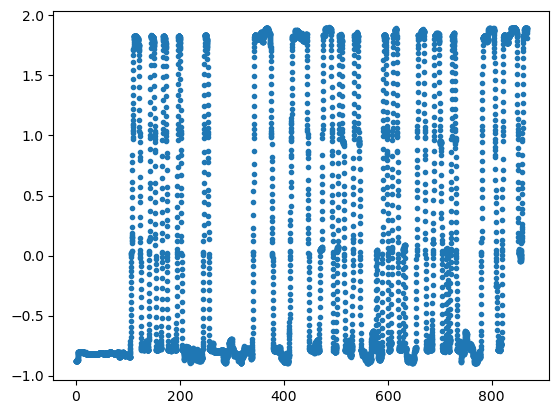

In [509]:
xp = t_behavior ### unit in sec
fp = linearized_behavior
x = t_miniscope


miniscope_position = np.interp(x, xp, fp)   ### spit out y array which is the interpolated position for behavior from neuron imaging data
plt.plot(x, miniscope_position, '.')


In [517]:
miniscope_position.shape, np.shape(new_data), rates.shape

((8677,), (8677,), (434,))

In [518]:
434*20

8680

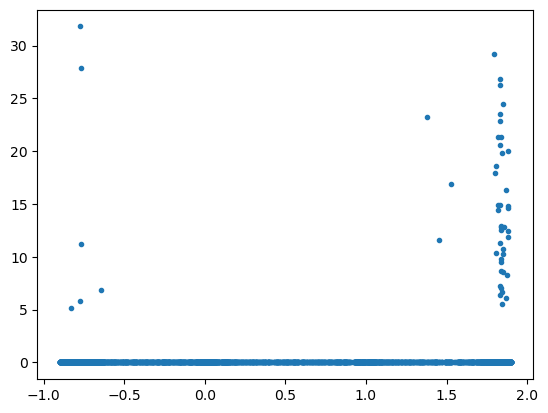

In [516]:
plt.plot(miniscope_position, new_data, '.')

In [ ]:
plt.plot(miniscope_position, rates, '.')


In [ ]:
# type(i_sorted_by_max.value())

In [ ]:
# # Junk 

# plt.plot(t_miniscope, d)
# plt.plot(t_behavior, linearized_behavior+1)
# plt.axhline(1, c='r')
# plt.axhline(2, c='r')
# plt.ylim(-1, 5)
# plt.show()


# # Linearized Behavior Plot
# fig = plt.figure(figsize=(8, 2))
# ax = fig.gca()
# plt.grid()
# for c in range(1,6):
#         plt.scatter([linearized_behavior[i] for i in range(len(cat)) if cat[i] == c], [1 for i in range(len(cat)) if cat[i] == c])
# plt.xlim(-1,2)
# plt.ylim(0.9,1.1)
# label_behavior_plot(ax)
# ax.set_yticks([])
# ax.set_xticks(np.arange(-1, 2.1, 0.5))
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[0] = 'Arm 1'
# labels[1] = ''
# labels[2] = 'Corner 1'
# labels[3] = 'Center'
# labels[4] = 'Corner 2'
# labels[5] = ''
# labels[6] = 'Arm 2'
# ax.set_xticklabels(labels)
# plt.title("Linearized Behavior Position (n = "+ str(len(cat))+ ")")
# plt.show()


# bin_means, bin_edges, binnumber = stats.binned_statistic(linearized_behavior[a], t_behavior[a])

# bin_width = (bin_edges[1] - bin_edges[0])
# bin_centers = bin_edges[1:] - bin_width/2

# plt.figure()
# # plt.hist(linearized_behavior[a], bins=50, density=True, histtype='stepfilled',
# #          alpha=0.2, label='histogram of data')
# # plt.plot(x, x_pdf, 'r-', label='analytical pdf')
# plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=2,
#            label='binned statistic of data')
# # plt.plot((binnumber - 0.5) * bin_width, x_pdf, 'g.', alpha=0.5)
# plt.legend(fontsize=10)
# plt.show()

# i = np.argsort(np.max(data, axis=1))
# i